### **Import moduli:**

In [15]:
# Imports PIL module 
from PIL import Image
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
# open method used to open different extension image file
im = Image.open("/cell0001.png") 

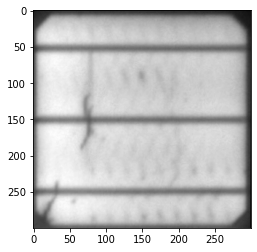

In [17]:
# This method will show image in any image viewer 
pyplot.imshow(im, cmap=pyplot.get_cmap('gray'))

### **Creazione del Dataset:**
si assegnano alle immagini le etichette stabilite in: labels.csv

In [82]:
names = []
imges=[]
labels = []
data = {}
with open('/labels.csv', 'r') as f:
    for line in f.readlines():
      labels.append(line[-2])
      #imgs.append(Image.open(f"/{line[7:19]}") )
      imges.append(Image.open("/cell0001.png"))
      names.append(line[7:19])
      data[line[7:19]]=line[-2]


X_train, X_test, y_train, y_test = train_test_split(names, labels, random_state=104, test_size=0.25, shuffle=True)


In [84]:
print(X_train[1])
print(imges[0])


cell1370.png
<PIL.PngImagePlugin.PngImageFile image mode=L size=300x300 at 0x7FBEB398C160>


In [77]:
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import keras

'''
supponendo di voler usare questa architettura resta da risolvere il problema della dimensione dell' input deve concidere con quella dell' immagine.
'''
model = Sequential()
model.add(Conv2D(64, (5,5), input_shape=(1, 300, 300, 1)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
#model.add(Dense(32))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=64, epochs=2)




Epoch 1/2


ValueError: ignored